### Link for data visualization dashboard at Tableau Public: 
https://public.tableau.com/app/profile/catherine.mulyadi/viz/Project1AirbnbHostingStrategiesinNYCDashboard/MilestoneProject1-Catherine


======================================================================================================================================================================================================================================
# <center>MILESTONE PROJECT PHASE 0</center>


### <center>Name  : Catherine Helenna Mulyadi</center>


<center>This program analyzes the room type popularity in New York City based on listing availability. The insights generated will inform hosting strategies to enhance Airbnb's performance by identifying potential markets for new listings.</center>


======================================================================================================================================================================================================================================


## I. PROBLEM IDENTIFICATION

#### 1. **THEME**

##### <center>IMPROVING AIRBNB HOSTING STRATEGIES THROUGH IN-DEPTH ROOM TYPE ANALYSIS</center>


#### 2. **SMART GOAL**

1. **SPECIFIC**
- Investigate the popularity of Airbnb room types among the neighbourhood groups in New York City.
2. **MEASURABLE**
- Popular room type is defined average availability of the room in a year is less than or equal to 120 days and which room type is dominant in Airbnb.
3. **ACHIEVABLE**
- Check the effect of room pricing on minimum nights the guests stayed.
- Compare room availability between different neighbourhoods.
4. **RELEVANT**
- To provide better hosting strategies.
5. **TIME-BOUND**
- Achieve the target in a month.



##### **<center>PROBLEM STATEMENT<center>**

Investigate the popularity of Airbnb room types in New York City, specifically those with an availability of less than 120 days. Analyze room types, neighborhood variances, and pricing influences on the minimum booking duration for guests, with the goal of completing the study within a one-month timeframe.

#### 3. **BACKGROUND**

With the increasing number of accessible transportation modes for travelling, the demand of accommodation is also rising since the last decade. Thanks to this phenomenon, one of the well-known accommodation provider service companies, Airbnb,is gaining more hosts as well as guests. Airbnb would like to expand its reach on potential locations in New York City so the company is interested to find out what kind of room type is currently popular in terms of annual availability and ownership.<br>

As a data analyst working in Airbnb, you need to figure out how to obtain those information from a provided Airbnb dataset in New York City in 2019. By finding those information, you can give insight to the company about the next hosting strategies to fulfill the demand better.

#### 4. **PROBLEM DESCRIPTION**

##### Method: 5W + 1H

<u>Method: Descriptive Statistics and Bar Graph Visualization</u>

1. Which neighbourhood group is most popular based on average availability of room in a year? (the average should have the lowest value since it means the room is booked in more days)

<u>Method: Geospatial Heatmap Visualization</u>

2. How is the distribution of popular Airbnb rooms in each neighbourhood?

<u>Method: Pie Chart Visualization</u>

3. How is the proportion of room types available on Airbnb?

<u>Method: Descriptive Statistics, Boxplot Visualization</u>

4. How are the prices of all rooms in each neighbourhood groups and check outliers?

<u>Method: ANOVA test (Inferential Statistics)</u>

5. Are there any significant differences of prices among the neighbourhood groups?

  - H0: there is no significant difference about the prices in all neighbourhood groups.

  - H1: there is a significant difference about the prices from one neighbourhood group to another.


<u>Method: Scatter-plot and Correlation Tests</u>

6. How is the relationship between the Airbnb price and the minimum booked nights?


## 2. DATA LOADING PROCESS

##### - Note: data was taken from a Kaggle dataset.
##### - Source: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data
##### - or you can use this CSV file: AB_NYC_2019.csv

In [1]:
# Import necessary libraries
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data loading
# you can replace the filepath name according to your dataset file path
main_df = pd.read_csv('/Users/catherinemulyadi/Data Science Projects/Airbnb-Hosting-Strategies-in-NYC/AB_NYC_2019.csv')

# show the first 5 data
main_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### **RAW DATA UNDERSTANDING:**
- The data contains various information related to Airbnb hosts in New York City for 2019.

- The Airbnb host information include 'host_id' and 'host_name' while the Airbnb's identity such as 'id', 'name', 'room_type', and 'price'. Furthermore, details about Airbnb location are shown by 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude'.

- Other supporting data related to Airbnb's host performance are classified into different columns as described below:
    - 'number_of_reviews',
    - 'last_review',
    - average reviews received per month ('review_per_month'),
    - how many properties the host has listed on Airbnb ('calculate_host_listings_count'), and
    - availability of room throughout the year ('availability_365').

In [3]:
# check if there are some null values and data type is correct before further processing
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### **INSIGHT:**
- There are total of 48895 data in most columns except several columns: 'name' (48879), 'host_name' (48874), 'last_review' and 'reviews_per_month' (38843).

- The data type for each column is already correct so there is no need for data type conversion.

- Since the percentage of null data in column 'name' is around 0.03% and column 'host_name' is about 0.4%, we can drop the rows associated with it. Apart from that, it's meaningless to analyze data related to performance of Airbnb and its host without knowing who or what they are.

- If the 'number_of_reviews' is equal to 0, then 'last_review' can be filled with 'no reviews yet' and 'reviews_per_month' is 0. Let's see how many null data remains.

- If the price <= 0, it's an invalid data since you wouldn't rent Airbnb for free or pay to the guest.

## 3. DATA CLEANING


#### **1. Treatment with NaN values in 'name' and 'host_name' columns:**

- Filling NaN values with 'unknown' in column 'name' and 'host_name' for easier NaN value removal.

In [4]:
# fill NaN values with 0 in column Year
main_df['name'].fillna(value='unknown', inplace = True)

# fill NaN values with 'unknown' in column Publisher
main_df['host_name'].fillna(value='unknown', inplace = True)

#### **2. Filtering converted NaN values out from the dataset:**


In [5]:
# make a new dataset

clean_df = main_df.copy()

clean_df = clean_df[(clean_df['name']!='unknown') & (clean_df['host_name']!='unknown')]

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48858 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   48858 non-null  object 
 6   latitude                        48858 non-null  float64
 7   longitude                       48858 non-null  float64
 8   room_type                       48858 non-null  object 
 9   price                           48858 non-null  int64  
 10  minimum_nights                  48858 non-null  int64  
 11  number_of_reviews               48858 non-null  int64  
 12  last_review                     38821

In [6]:
# reset the index
clean_df.reset_index(drop = True, inplace = True)

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48858 entries, 0 to 48857
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48858 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   48858 non-null  object 
 6   latitude                        48858 non-null  float64
 7   longitude                       48858 non-null  float64
 8   room_type                       48858 non-null  object 
 9   price                           48858 non-null  int64  
 10  minimum_nights                  48858 non-null  int64  
 11  number_of_reviews               48858 non-null  int64  
 12  last_review                     

In [7]:
# for columns related to reviews

# column 'last_review'
clean_df['last_review'] = np.where(clean_df['number_of_reviews']==0,'no reviews yet', clean_df['last_review'])

# column 'reviews_per_month'
clean_df['reviews_per_month'] = np.where(clean_df['number_of_reviews']==0, 0, clean_df['reviews_per_month'])

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48858 entries, 0 to 48857
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48858 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   48858 non-null  object 
 6   latitude                        48858 non-null  float64
 7   longitude                       48858 non-null  float64
 8   room_type                       48858 non-null  object 
 9   price                           48858 non-null  int64  
 10  minimum_nights                  48858 non-null  int64  
 11  number_of_reviews               48858 non-null  int64  
 12  last_review                     

In [8]:
# drop column 'last_review'

clean_df = clean_df.drop('last_review', axis = 1)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48858 entries, 0 to 48857
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48858 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   48858 non-null  object 
 6   latitude                        48858 non-null  float64
 7   longitude                       48858 non-null  float64
 8   room_type                       48858 non-null  object 
 9   price                           48858 non-null  int64  
 10  minimum_nights                  48858 non-null  int64  
 11  number_of_reviews               48858 non-null  int64  
 12  reviews_per_month               

In [9]:
# exclude data with the Airbnb's price <= 0

clean_df = clean_df[(clean_df['price'] > 0)]

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48847 entries, 0 to 48857
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48847 non-null  int64  
 1   name                            48847 non-null  object 
 2   host_id                         48847 non-null  int64  
 3   host_name                       48847 non-null  object 
 4   neighbourhood_group             48847 non-null  object 
 5   neighbourhood                   48847 non-null  object 
 6   latitude                        48847 non-null  float64
 7   longitude                       48847 non-null  float64
 8   room_type                       48847 non-null  object 
 9   price                           48847 non-null  int64  
 10  minimum_nights                  48847 non-null  int64  
 11  number_of_reviews               48847 non-null  int64  
 12  reviews_per_month               48847

In [10]:
# convert to csv file
clean_df.to_csv('main data.csv')

#### **INSIGHT:**

- There are 48847 clean data which will be analyzed further and processed into visualizations.

- The cause of NaN values in review related columns can be solved by implementing logic if number_of_reviews == 0, then reviews_per_month == 0 and last_review == 'no reviews yet'. The column 'last_review' is irrelevant to fulfill purpose in SMART GOAL section so it will be removed.

- Now the data is ready for use.

## 4. ANALYSIS AND CALCULATION METHODS

##### Note: EDA and statistical methods are implemented to answer the problem statement and problem description points.


#### 1. **WHICH NEIGHBOURHOOD GROUP IS POPULAR FOR BOOKING BASED ON AVERAGE ROOM AVAILABILITY?**

In [11]:
# make a copy of cleaned dataframe in a new variable called popular_roomtype
popular_roomtype = clean_df.copy()

popular_roomtype = popular_roomtype.sort_values(by='neighbourhood_group', ascending=True)

# create popular_roomtype dataframe from filtering and name the mean availability_365 as average_availability
popular_roomtype  = pd.DataFrame(popular_roomtype.groupby(['room_type','neighbourhood_group'])['availability_365'].mean().round(2).reset_index(name='average_availability'))


popular_roomtype

,room_type,neighbourhood_group,average_availability
0,Entire home/apt,Bronx,158.35
1,Entire home/apt,Brooklyn,97.16
2,Entire home/apt,Manhattan,117.16
3,Entire home/apt,Queens,132.27
4,Entire home/apt,Staten Island,178.07
5,Private room,Bronx,171.40
6,Private room,Brooklyn,99.96
7,Private room,Manhattan,101.91
8,Private room,Queens,149.29
9,Private room,Staten Island,226.36


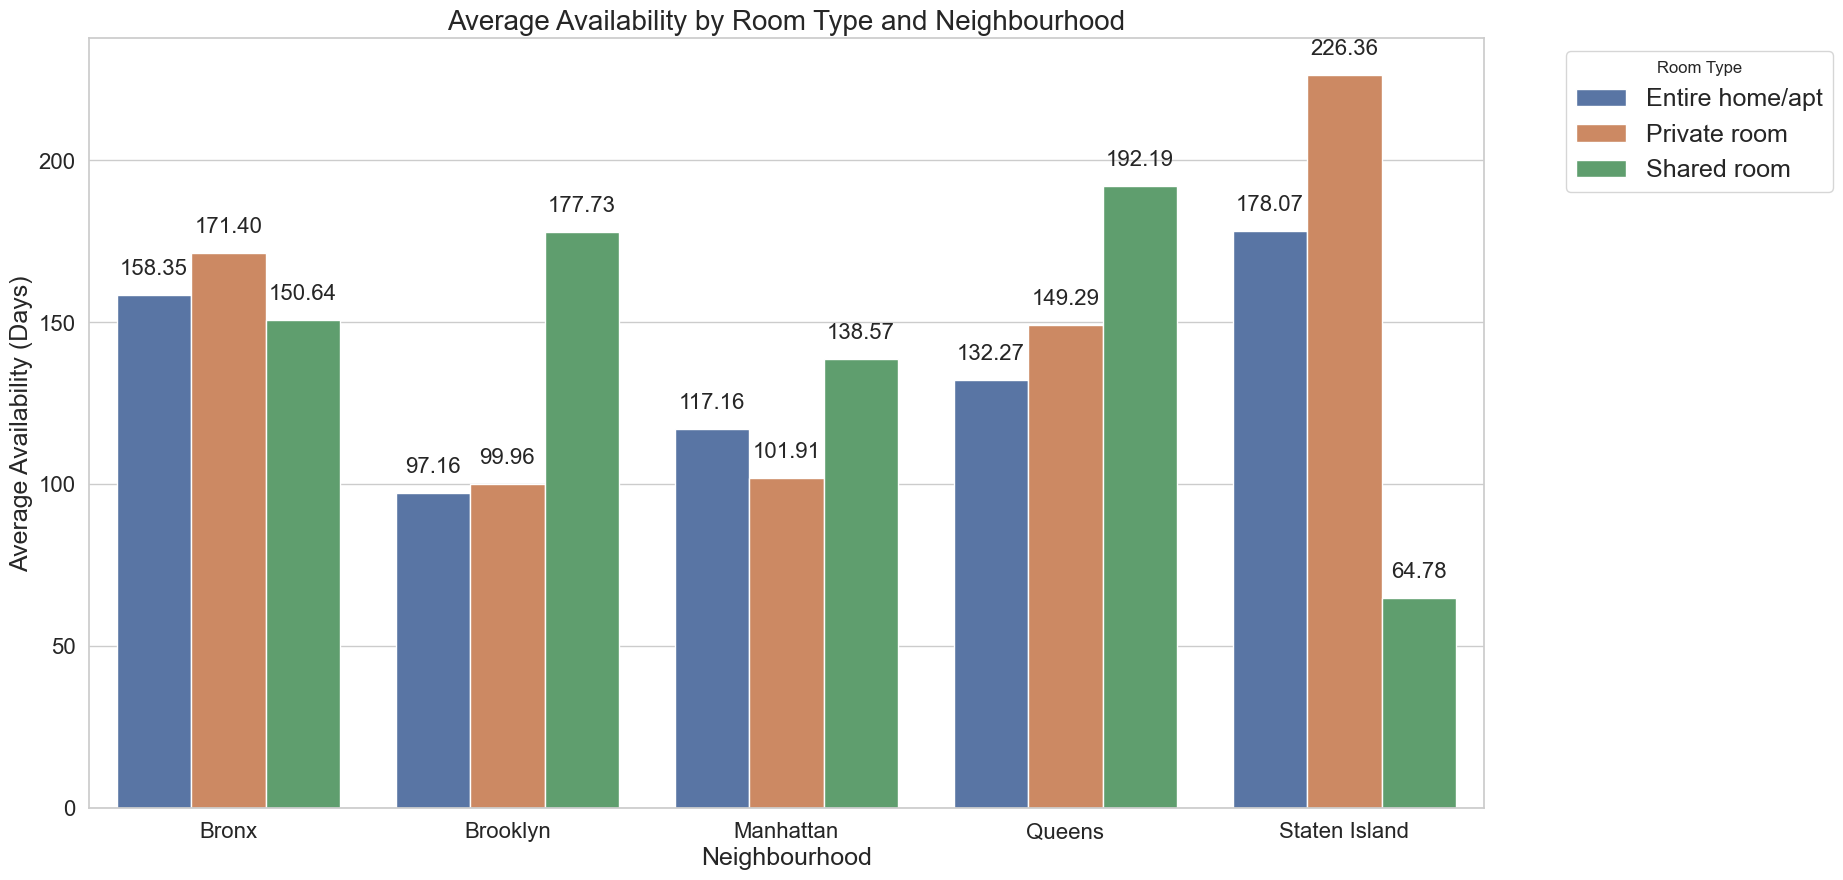

In [12]:
# Set the style when using seaborn
sns.set(style="whitegrid")

# Combine data for all neighborhoods into one DataFrame
combined_data = popular_roomtype.reset_index()

# Set up the figure size
plt.figure(figsize=(18, 10))

# Plot the bar graph for all neighborhoods
ax = sns.barplot(x='neighbourhood_group', y='average_availability', hue='room_type', data=combined_data)

# Set font size for axis labels
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

# Labelling values on bar graph
for patch in ax.patches:
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2, height + 5, f'{height:.2f}', ha='center', va='bottom', fontsize = 16)

# Labelling the graph
plt.title('Average Availability by Room Type and Neighbourhood', fontsize = 20)
plt.xlabel('Neighbourhood', fontsize = 18)
plt.ylabel('Average Availability (Days)', fontsize = 18)
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 18)
# Show final plot
plt.show()

#### **INSIGHT:**

- Based on the bar graph, it's found that Manhattan is the most popular neighbourhood group for Airbnb booking as it has overall the lowest average availability.

- The second most popular neighbourhood group is Brooklyn which is more concentrated on 'Private room' and 'Entire home/apt' room types.

- Both Bronx and Queens are classified as unpopular neighbourhoods for Airbnb bookings since each room type has average availability > 120 days.

- Lastly, Staten Island's 'Shared room' room type is the most popular among all neighbourhoods (64.78 days) but least popular for the other room types.

#### 2. **GEOSPATIAL HEATMAP DISTRIBUTION OF POPULAR AIRBNB ROOMS IN THE NEIGHBOURHOODS**



In [13]:
# prepare dataset in nested list form
# format data = [[latitude,longitude,value],...]
# where 0 <= value <= 1
# so make the density of available days by dividing the number of days with total number of days in a year (365)
heatmap_data = {'latitude': clean_df['latitude'],'longitude': clean_df['longitude'],'density_availability_day': clean_df['availability_365']/365}

# create the dataset
heatmap_list = [list(item) for item in zip(heatmap_data['latitude'], heatmap_data['longitude'], heatmap_data['density_availability_day'])]



In [14]:
# import libraries for making geospatial heatmap
import folium
from folium.plugins import HeatMap
# there are two basic parameters to initiate folium map: location, zoom_start

# use this page to find the latitude and longitude
# https://www.latlong.net/

# you can adjust the initial zoom size on the map, 10 is good
# this is the latitude and longitude of NEW YORK CITY
m = folium.Map(location=[40.712776,-74.005974],zoom_start = 10)

# create color gradient

color_gradient = {
    0.0: 'navy',
    0.2: 'blue',
    0.4: 'dodgerblue',
    0.6: 'lightblue',
    0.8: 'skyblue',
    1.0: 'aqua'
}

# add heatmap data on map object 'm'
HeatMap(heatmap_list, gradient=color_gradient).add_to(m)

# add marker for neighbourhood_groups
folium.Marker(location=[40.783058,-73.971252], popup = 'Manhattan').add_to(m)
folium.Marker(location=[40.844784, -73.864830], popup = 'Bronx').add_to(m)
folium.Marker(location=[40.678177, -73.944160], popup = 'Brooklyn').add_to(m)
folium.Marker(location=[40.579533, -74.150200],popup = 'Staten Island').add_to(m)
folium.Marker(location=[40.728226, -73.794853], popup = 'Queens').add_to(m)

# Download the HTML file so you can view on web
m.save('heatmap.html')

# to view the file, write this on terminal: python -m http.server
# then, while pressing command, click the link shown: http://[::]:8000/

In [71]:
# download csv file
heatmap_df = pd.DataFrame(heatmap_data)

heatmap_df.to_csv('heatmap.csv')

#### **INSIGHT:**

- Based on the geospatial heatmap, it is clearly seen that Manhattan has the most dense Airbnb housing whereas Staten Island has the least dense Airbnb housing.

- The average availability in all neighbourhood lies approximately between 0.4-0.8 density of availability_day365, which is from 146 to 292 days.

#### 3. **PIE CHART TO ILLUSTRATE PROPORTION OF ROOM TYPES AVAILABLE ON AIRBNB**

In [15]:
def percentage_calculator(data,price_range):
  percentage_keeper = []
  total = sum(data)
  for i in range(len(data)):
    calculate = round((data[i]/total) * 100,2)
    percentage_keeper.append(calculate)
  return percentage_keeper

In [16]:
# create a separate table to keep original table
room_df = clean_df.copy()
# create a dataframe containing room_type and total number of rooms
# use size to count the number of each element (room_type)
count_df = pd.DataFrame(room_df.groupby('room_type').size().reset_index(name='total_rooms'))
count_df


,room_type,total_rooms
0,Entire home/apt,25391
1,Private room,22299
2,Shared room,1157


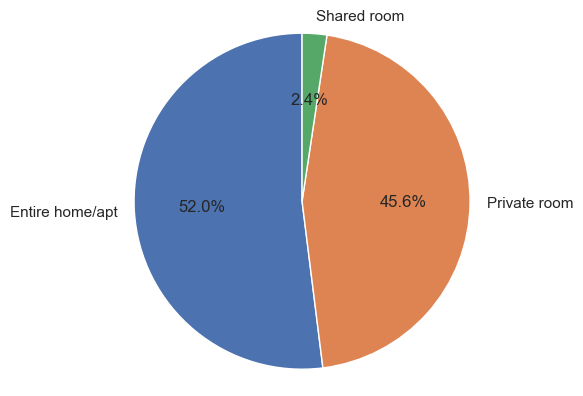

In [17]:
# define the label and proportion sizes
label_name = ['Entire home/apt','Private room','Shared room']
proportion_sizes = percentage_calculator(count_df['total_rooms'],label_name)

# plotting the pie chart
plt.pie(proportion_sizes, labels=label_name, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# show pie chart
plt.show()

In [18]:
# create the dataset
pie_data = {'Entire home/apt': [proportion_sizes[0]],'Private room': [proportion_sizes[1]],'Shared room': [proportion_sizes[2]]}

pie_df = pd.DataFrame(pie_data)

pie_df

,Entire home/apt,Private room,Shared room
0,51.98,45.65,2.37


In [67]:
# download csv file
pie_df.to_csv('pie_chart_roomtype.csv')

#### **INSIGHT:**

- The pie chart depicts the proportion of room types owned by the Airbnb hosts.

- Among all room types, 'Entire home/apt' dominates the total rooms by slightly more than half, at 52%.

- The second highest proportion is held by 'Private room' which covers almost the other half of the pie, at 45.6%, leaving 2.4% remained for 'Shared room'.

- Thus, most Airbnb hosts own either 'Entire home/apt' or (and) 'Private room'.

#### 4. **COMPARISON OF PRICES OF ALL ROOM TYPES AND CHECK OUTLIERS**

In [19]:
# show descriptive statistical values
def desc_stats(d,col_name):
    d_sorted = d.sort_values(by=col_name)
    group_name = ', '.join(map(str, d_sorted['neighbourhood_group'].unique()))

    # central tendency calculation
    rounded_mean = round(d_sorted[col_name].mean(),2)
    rounded_median = round(d_sorted[col_name].median(),2)

    # dispersion calculation: STD, IQR
    rounded_std = round(d_sorted[col_name].std(),2)
    # for IQR (interquartile range) calculation
    q1 = d_sorted[col_name].quantile(0.25)
    q3 = d_sorted[col_name].quantile(0.75)
    rounded_iqr = round(q3 -q1,2)
    # upper and lower boundaries
    upper_bound = round((rounded_median + 1.5*rounded_iqr),2)
    lower_bound = round((rounded_median - 1.5*rounded_iqr),2)

    # about data distribution and existence of extreme values indicators
    rounded_skew = round(d_sorted[col_name].skew(),2)
    rounded_kurtosis = round(d_sorted[col_name].kurtosis(),2)
    for name in d_sorted.columns:
        # to print only specific col_name
        if col_name == name:

            # remove quotation mark on column name (col_name)
            print(f"Descriptive statistics for prices in neighbourhood '{group_name}':")
            print(f"Mean: {rounded_mean}")
            print(f"Median: {rounded_median}")
            print(f"Standard deviation: {rounded_std}")
            print(f"Interquartile range: {rounded_iqr}")
            print(f"Skewness: {rounded_skew}")
            print(f"Kurtosis: {rounded_kurtosis}")

            # to calculate how many outlier data
            outlier_data = d_sorted[col_name][(d_sorted[col_name]< lower_bound)| (d_sorted[col_name]>upper_bound)]
            total_outlier = len(outlier_data)
            print(f'There are {total_outlier} outlier data.')
            break
        else:
            pass


In [20]:
# make new dataframes to make individual descriptive statistics analysis
neighbourhood_df = clean_df.copy()
bronx_df = pd.DataFrame(neighbourhood_df[neighbourhood_df['neighbourhood_group']== 'Bronx'].sort_values(by='price', ascending = True).reset_index(drop=True))
brooklyn_df = pd.DataFrame(neighbourhood_df[neighbourhood_df['neighbourhood_group']== 'Brooklyn'].sort_values(by='price', ascending = True).reset_index(drop=True))
manhattan_df = pd.DataFrame(neighbourhood_df[neighbourhood_df['neighbourhood_group']== 'Manhattan'].sort_values(by='price', ascending = True).reset_index(drop=True))
queens_df = pd.DataFrame(neighbourhood_df[neighbourhood_df['neighbourhood_group']== 'Queens'].sort_values(by='price', ascending = True).reset_index(drop=True))
staten_df = pd.DataFrame(neighbourhood_df[neighbourhood_df['neighbourhood_group']== 'Staten Island'].sort_values(by='price', ascending = True).reset_index(drop=True))

In [21]:
# for Bronx neighbourhood
desc_stats(bronx_df,'price')

Descriptive statistics for prices in neighbourhood 'Bronx':
Mean: 87.55
Median: 65.0
Standard deviation: 106.82
Interquartile range: 54.0
Skewness: 12.5
Kurtosis: 248.75
There are 106 outlier data.


In [22]:
# for Brooklyn neighbourhood
desc_stats(brooklyn_df,'price')

Descriptive statistics for prices in neighbourhood 'Brooklyn':
Mean: 124.47
Median: 90.0
Standard deviation: 186.96
Interquartile range: 90.0
Skewness: 23.46
Kurtosis: 878.36
There are 1695 outlier data.


In [23]:
# for Manhattan neighbourhood
desc_stats(manhattan_df,'price')

Descriptive statistics for prices in neighbourhood 'Manhattan':
Mean: 196.91
Median: 150.0
Standard deviation: 291.49
Interquartile range: 125.0
Skewness: 15.94
Kurtosis: 399.25
There are 2147 outlier data.


In [24]:
# for Queens neighbourhood
desc_stats(queens_df,'price')

Descriptive statistics for prices in neighbourhood 'Queens':
Mean: 99.54
Median: 75.0
Standard deviation: 167.13
Interquartile range: 60.0
Skewness: 39.16
Kurtosis: 2200.55
There are 615 outlier data.


In [25]:
# for Staten Island neighbourhood
desc_stats(staten_df,'price')

Descriptive statistics for prices in neighbourhood 'Staten Island':
Mean: 114.81
Median: 75.0
Standard deviation: 277.62
Interquartile range: 60.0
Skewness: 15.09
Kurtosis: 260.15
There are 44 outlier data.


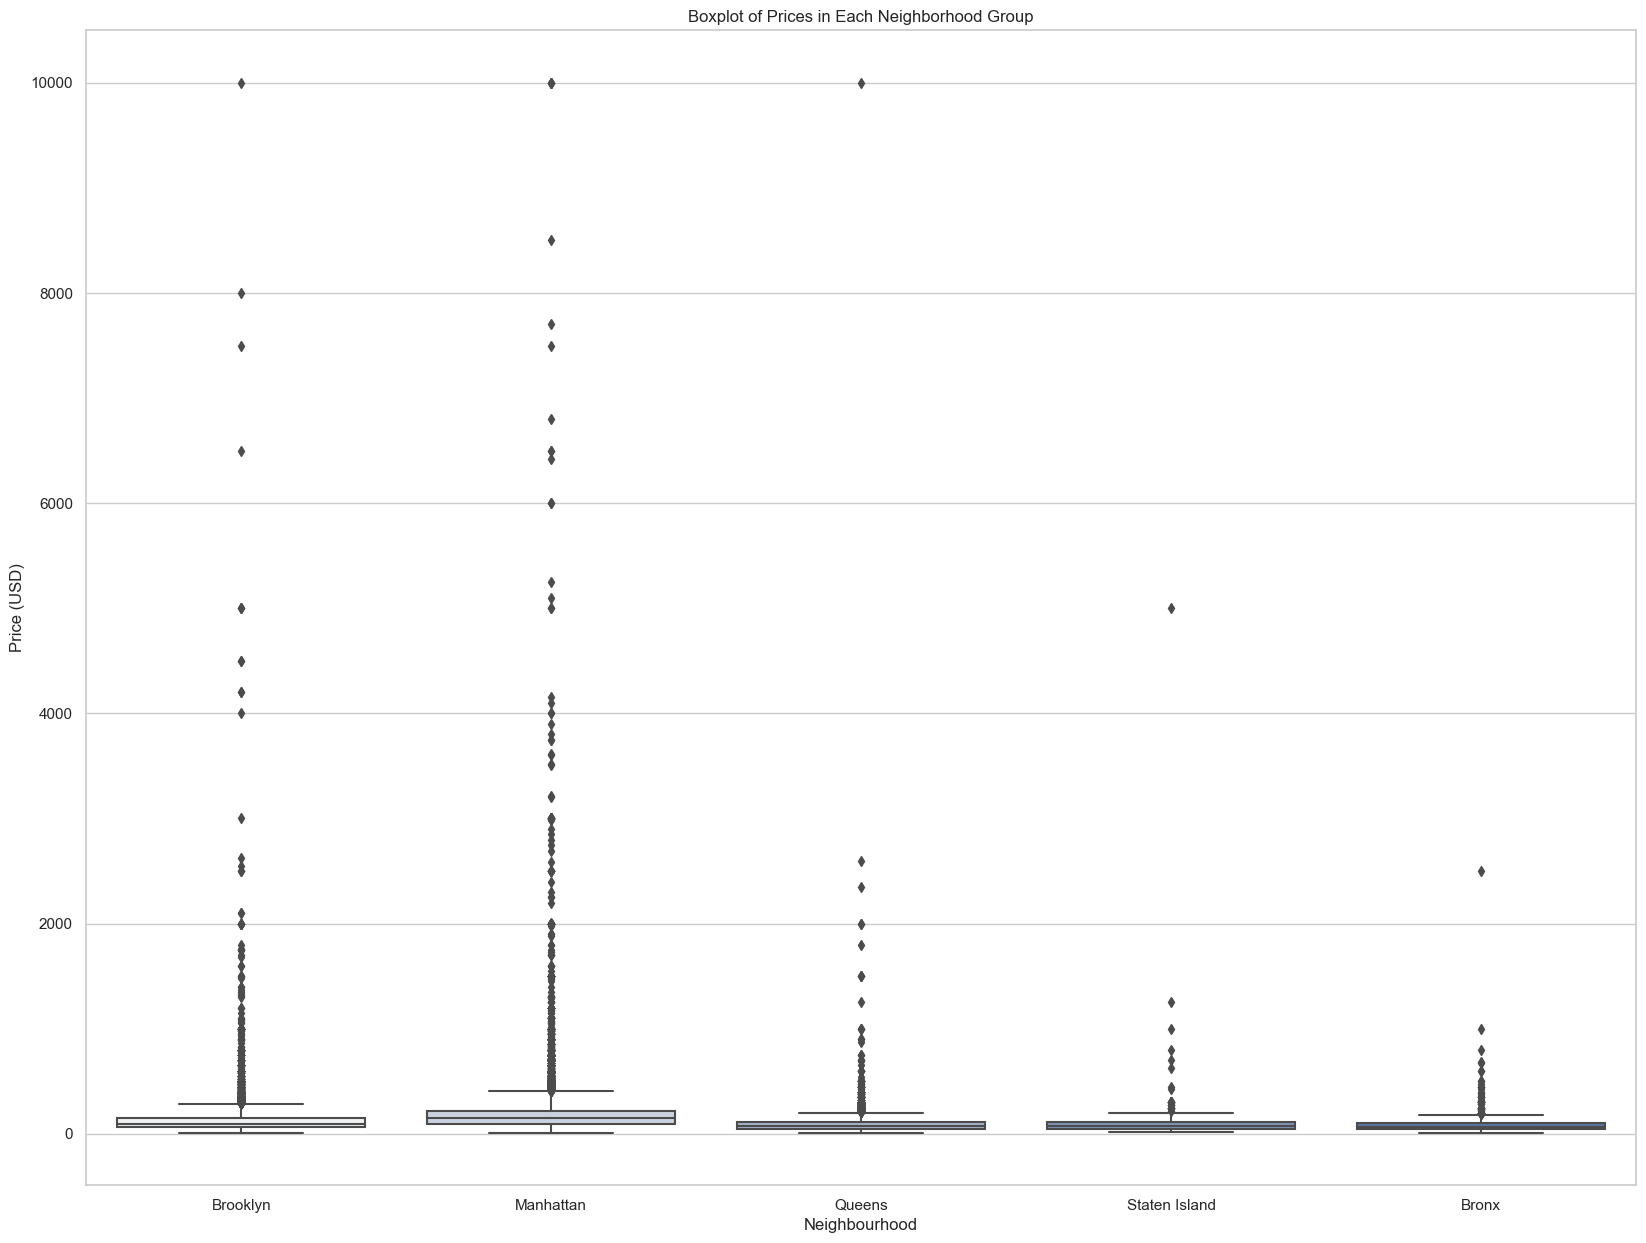

In [26]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a boxplot
plt.figure(figsize=(20, 15))
sns.boxplot(x='neighbourhood_group', y='price', data=neighbourhood_df, palette="light:b")
plt.xlabel('Neighbourhood')
plt.ylabel('Price (USD)')
plt.title('Boxplot of Prices in Each Neighborhood Group')
plt.show()

#### **INSIGHT:**

- The boxplots for Airbnb room prices describes the price distribution in each neighbourhood group.

- Among all neighbourhoods, Manhattan has the most widepsread price variation, followed by Brooklyn, Queens, Staten Island, and Bronx.

- This observation is supported by standard deviation (std) and interquartile range (iqr) calculation result from each group. Similar to the boxplot, the order of the neighbourhood group is the same from highest to lowest both std and iqr. Here is the details for each group:
    1. Manhattan(std:291.49, iqr:125.0)
    2. Brooklyn(std:186.96, iqr:90.0)
    3. Staten Island(std:277.62, iqr:60.0)
    4. Queens(std:167.13, iqr:60.0)
    5. Bronx(std:106.82, iqr:54.0)

- This result is reasonable since more various prices is originated from other factors such as market dynamics. Based on insights from point 1, popularity of neighbourhood can affect pricing strategies.


#### 5. **HOW TO CONFIRM IF THERE IS A SIGNIFICANT DIFFERENCE IN PRICES BETWEEN THE NEIGHBOURHOOD GROUPS?**

Method: ANOVA test (Inferential Statistics)

- H0: there is no significant difference about the prices in all neighbourhood groups.

- H1: there is a significant difference about the prices from one neighbourhood group to another.

In [27]:
# use the tables prepared in step 3 to conduct the calculation
# compare the average price values between the neighbourhood groups
print(f'Average Price of Airbnb rooms in Bronx: USD {bronx_df["price"].mean():.2f}')
print(f'Average Price of Airbnb rooms in Brooklyn: USD {brooklyn_df["price"].mean():.2f}')
print(f'Average Price of Airbnb rooms in Manhattan: USD {manhattan_df["price"].mean():.2f}')
print(f'Average Price of Airbnb rooms in Queens: USD {queens_df["price"].mean():.2f}')
print(f'Average Price of Airbnb rooms in Staten Island: USD {staten_df["price"].mean():.2f}')

Average Price of Airbnb rooms in Bronx: USD 87.55
Average Price of Airbnb rooms in Brooklyn: USD 124.47
Average Price of Airbnb rooms in Manhattan: USD 196.91
Average Price of Airbnb rooms in Queens: USD 99.54
Average Price of Airbnb rooms in Staten Island: USD 114.81


In [28]:
res = stats.f_oneway(bronx_df["price"], brooklyn_df["price"], manhattan_df["price"],queens_df["price"],staten_df["price"])
print('The p-value:',res.pvalue)

The p-value: 4.208501569800712e-301


#### **INSIGHT:**

- The ANOVA test result rejects the null hypothesis since the p-value, that is equivalent to 4.208501569800712e-301, is less than the critical value, 0.05.
- This means that the prices indeed differ depending on the neighbourhood groups.

#### 6. **THE RELATIONSHIP BETWEEN THE AIRBNB PRICE AND THE MINIMUM BOOKED NIGHT**

In [30]:
# make the dataset first

price_vs_minbook = {'price':clean_df['price'], 'minimum_nights': clean_df['minimum_nights']}

pvm_df = pd.DataFrame(price_vs_minbook)

pvm_df

,price,minimum_nights
0,149,1
1,225,1
2,150,3
3,89,1
4,80,10
...,...,...
48853,70,2
48854,40,4
48855,115,10
48856,55,1


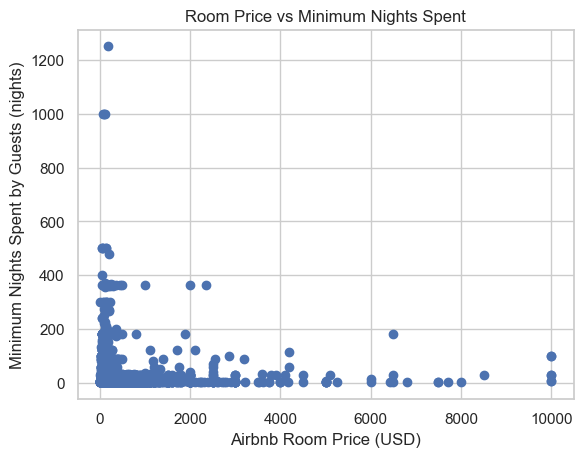

In [31]:
from scipy.optimize import curve_fit
# construct a scatter plot to check relationship between
# Airbnb price and minimum nights stayed

# define x and y values
x_val = pvm_df['price']
y_val = pvm_df['minimum_nights']


# scatterplot
plt.scatter(x_val,y_val)

# Set labels and title
plt.xlabel('Airbnb Room Price (USD)')
plt.ylabel('Minimum Nights Spent by Guests (nights)')
plt.title('Room Price vs Minimum Nights Spent')

# Show the plot
plt.show()

In [32]:
# correlation tests between Airbnb Room Price and Minimum Nights Spent by Guests

# Pearson: linear relationship testing
corr_r, pval_p = stats.pearsonr(pvm_df['price'], pvm_df['minimum_nights'])

# Spearman: monotonic relationship testing
corr_rho, pval_s = stats.spearmanr(pvm_df['price'], pvm_df['minimum_nights'])

# Kendall-Tau: rank relationship testing
corr_tau, pval_k = stats.kendalltau(pvm_df['price'], pvm_df['minimum_nights'])

print(f"r-correlation coefficient: {corr_r:.2f}, p-value: {pval_p}")
print(f"rho-correlation coefficient: {corr_rho:.2f}, p-value: {pval_s}")
print(f"tau-correlation coefficient: {corr_tau:.2f}, p-value: {pval_k}")

r-correlation coefficient: 0.04, p-value: 2.917903213606785e-21
rho-correlation coefficient: 0.10, p-value: 1.814789608442659e-111
tau-correlation coefficient: 0.07, p-value: 5.981833930845768e-114


In [60]:
# download csv file
pvm_df.to_csv('scatterplot_price_night.csv')

#### **INSIGHT:**

- The scatter plot gives a hint that the data distribution concentrates at price range 0-2500 USD. As the price increases, the density of data decreases.

- Based on the observation from previous point, there is a weak negative correlation between the variables.

- However, correlation tests such as:
  - Pearson(r-correlation coefficient),
  - Spearman(rho-correlation coefficient), and
  - Kendall-tau(tau-correlation coefficient),
  
  are needed to validate this finding.

- The null and alternative hypotheses for these correlation tests are defined as the following:
  - H0: No correlation if the correlation coefficient = 0
  - H1: Correlation exists if the correlation coefficient != 0

- Finally, the decision for accepting the hypothesis depends on the p-value.
  - p-value < 0.05, reject the null hypothesis.
  - p-value ≥ 0.05, fail to reject the null hypothesis.
where 0.05 represents statistical significance.


#### **INSIGHT AFTER IMPLEMENTING TESTS:**

- All correlation test coefficients suggest a very weak positive correlation as they are > 0.
  - Pearson(r:0.04, p-val: 2.91790321360179e-21)
  - Spearman(rho:0.10, p-val: 1.814789608442659e-111)
  - Kendall-tau(tau:0.07,p-val: 5.981833930845768e-114)

- Furthermore, all p-values (p-val) < 0.05 so the null hypothesis stating no correlation between Airbnb price and minimum nights stayed is rejected.

- Therefore, it can be inferred that there is a statistically significant relationship:

  " as Airbnb prices increase, the minimum nights guests stay also tend to increase, suggesting a (very weak) positive correlation between these variables. "


## 5. CONCLUSION



**IMPORTANT POINTS FROM ANALYSIS:**

To sum up, Manhattan and Brooklyn are the most popular Airbnb booking neighbourhood groups especially for 'Private room' and 'Entire home/apt' since the average availability of the rooms are less than 120 days.

Meanwhile, the 'Shared room' in Staten Island is the most favored among all neighbourhood groups since it has the least average availability of rooms in the year, at approximately 65 days.

On the other hand, Queens and Bronx are not considered favorite Airbnb booking sites as the average availability of the rooms for all room types are greater than 120 days.

Furthermore, Manhattan and Brooklyn also have the relatively large Airbnb price deviations compared to other regions. This result indicates the existence of other factors that make one neighbourhood group having significantly higher prices than the other which is confirmed by the ANOVA TEST result.

Note: Manhattan's price std (highest) -> 291.49 USD, Brooklyn's price std (third) -> 186.96 USD.



**SOLUTION FOR NEXT HOSTING STRATEGIES:**

Setting up more listings on Staten Island for 'Shared room' can fulfill the observed demand, leading to potential higher prices. Here are the consideration points:

- The geospatial heatmap distribution of popular Airbnb rooms suggests that Staten Island has less Airbnb listing density compared to Manhattan and Brooklyn although its 'Shared room' is most on demand.

- The pie chart points out how low 'Shared room' proportion is compared to other room types in the neighbourhoods. So, the competition for booking is also less.

- It is possible to set up high price on the listing since the guests tend to stay in longer periods for more expensive Airbnb rooms.
